# 🌱 HACKATHON 2025: CROP DISEASE DETECTION WITH DEEP LEARNING

**Institution:** University of Energy and Natural Resources (UENR)  
**Location:** Sunyani, Bono Region, Ghana - West Africa

---

## 📊 Project Overview
This project uses **deep learning models (CNN, transfer learning)** to detect and classify crop diseases from leaf images, supporting precision agriculture and reducing yield losses for farmers.

---

## 📂 Dataset Citations
**Dataset Source:**  
- Hughes, D. P., & Salathé, M. (2015). An open access repository of images on plant health to enable the development of mobile disease diagnostics. *arXiv preprint arXiv:1511.08060*.  
- [PlantVillage Dataset on Kaggle](https://www.kaggle.com/datasets/emmarex/plantdisease)

---

## 🛠️ Team Detectify
- **Sarfo Wonder Nana (UENR, Bsc Computer Engineering)**
- **Senyo Joel (UENR, Bsc Computer Engineering)**
- **Lanor Kwame Jephtath (UENR, Bsc Computer Engineering)**

---

> This notebook documents the dataset handling, preprocessing, model building, training, evaluation, and result visualization for crop disease detection during the Hackathon 2025 at Accra,Ghana.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

2025-07-19 12:40:05.897545: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# paths and folders and sample files
plant_village_dir = "/Users/sarfowonder/Downloads/PlantVillage"
sample_crop_file = "/Users/sarfowonder/Downloads/PlantVillage/PlantVillage/Pepper__bell___healthy/0b76f650-27cf-4b62-b3ad-c97d81e0db0c___JR_HL 8554.JPG"


# For debug , purposes only, Test if all directories exists

print(os.path.exists(plant_village_dir))


True


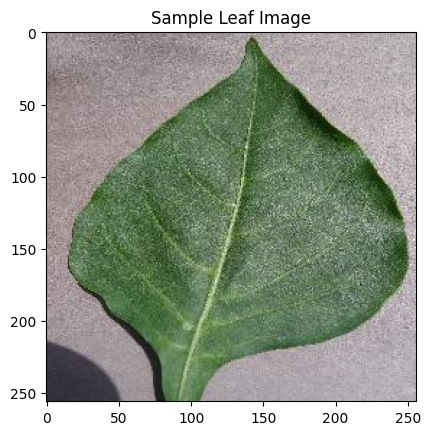

In [3]:
if sample_crop_file is None:
    print("Path does not exist")
else:
    sample_crop_image = Image.open(sample_crop_file)
    plt.imshow(sample_crop_image)
    plt.title('Sample Leaf Image')
    plt.axis('on')
    plt.show()

In [4]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [5]:
import splitfolders

# Pepper Folder

input_folder = "/Users/sarfowonder/Desktop/computer_Vison/plantVillage_testData/pepper"
output_folder = "/Users/sarfowonder/Desktop/plantVillage_testData/pepper_split"   # where the split dataset will go
if os.path.exists(input_folder) == True:
    splitfolders.ratio(
    input_folder,
    output=output_folder,
    seed=1337,
    ratio=(0.7, 0.2, 0.1),
    move=False
    )
else :
    print("Input Folder does not exist")
    

    


Copying files: 2475 files [00:04, 502.11 files/s]


In [6]:
# IMAGE DATA PREPROCESSING FOR PEPPER
resized_height, resized_width = 224, 224 # resizing height and width of images
batch_size = 32 
class_mode = 'categorical' # sets class mode 
color_mode = "rgb" # sets color mode
pepper_train_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/pepper_split/train"
pepper_val_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/pepper_split/val"

# For debug , purposes only, Test if all directories exists
print("does directory exists ? ")
print(os.path.exists(pepper_train_dir))
print(os.path.exists(pepper_val_dir))

does directory exists ? 
True
True


In [7]:
#   DATA AUGMENTATION FOR PEPPER FOLDER 
pepper_train_datagen =  ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    shear_range = 0.1,
)

# for validation, use only rescale
val_datagen = ImageDataGenerator(
    rescale = 1.0/255,
)   

pepper_train_generator = pepper_train_datagen.flow_from_directory(
    pepper_train_dir,
    target_size = (resized_height, resized_width),
    color_mode = "rgb",
    batch_size = batch_size,
    shuffle = True,
     
)
pepper_val_generator =  val_datagen.flow_from_directory(
    pepper_val_dir,
    target_size = (resized_height, resized_width),
    color_mode = "rgb",
    batch_size = batch_size,
    shuffle = True,
    
)



Found 1731 images belonging to 2 classes.
Found 494 images belonging to 2 classes.


class names ['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']


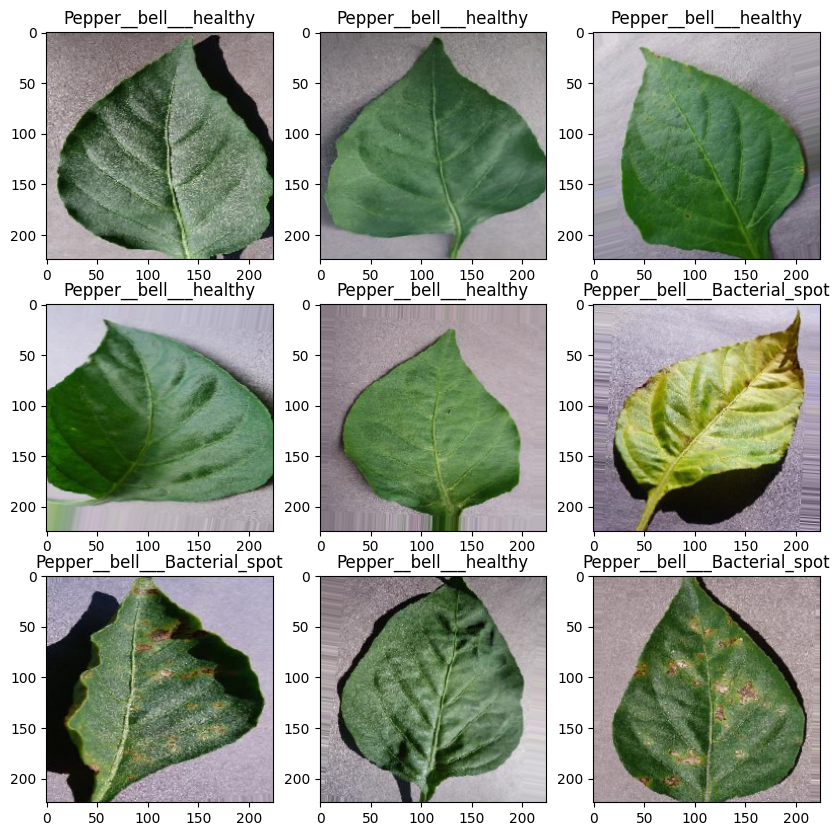

In [9]:
import matplotlib.pyplot as plt
class_names = list(pepper_train_generator.class_indices.keys()) # get class names 
print("class names", class_names)

# Display a batch of images
images, labels = next(pepper_train_generator)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis("on")
plt.show()
plt.close()


** Splitting of Potato folder into train, val and test
# Preprocessing of Potato Images 

In [11]:
#Potato Folder splitting

potato_folder = "/Users/sarfowonder/Desktop/plantVillage_testData/potato"
potato_output_folder = "/Users/sarfowonder/Desktop/plantVillage_testData/potato_split"   # where the split dataset will go

# For debug only
if os.path.exists(potato_folder) == True:
    splitfolders.ratio(
    potato_folder,
    output=potato_output_folder,
    seed=1337,
    ratio=(0.7, 0.2, 0.1), # splitting ratio
    move= True, # dont copy, move into new folder
)
else :
    print("path does not exist")





path does not exist


In [12]:
# POTATO DIRECTORIES
potato_train_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/potato_split/train" 
potato_val_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/potato_split/val"

# For debug , purposes only, Test if all directories exists
print("does directory exists ? ")
print(os.path.exists(potato_train_dir))
print(os.path.exists(potato_val_dir))

does directory exists ? 
True
True


In [13]:
# IMAGE PREPROCESSING AND DATA AUGMENTATION FOR POTATO FOLDER
potato_train_datagen =  ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range = 15,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    shear_range = 0.1,
)

# for validation, use only rescale
potato_val_datagen = ImageDataGenerator(
    rescale = 1.0/255,
)   


# Potato Train Generator
potato_train_generator = pepper_train_datagen.flow_from_directory(
    potato_train_dir,
    target_size = (resized_height, resized_width),
    color_mode = "rgb",
    batch_size = batch_size,
    shuffle = True,
     
)
potato_val_generator =  val_datagen.flow_from_directory(
    potato_val_dir,
    target_size = (resized_height, resized_width),
    color_mode = "rgb",
    batch_size = batch_size,
    shuffle = True,
    
)



Found 1506 images belonging to 3 classes.
Found 430 images belonging to 3 classes.


class names ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


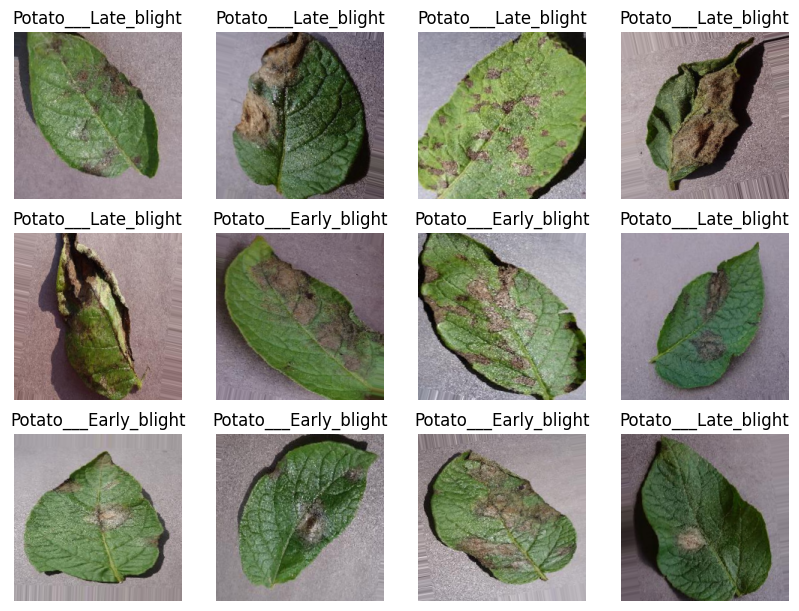

In [14]:
# VIZUALIZATION OF POTATO IMAGE SAMPLES( ALL CLASSES )
import matplotlib.pyplot as plt
potato_class_names = list(potato_train_generator.class_indices.keys()) # get class names 
print("class names", potato_class_names)

# Display a batch of images
potato_images, potato_labels = next(potato_train_generator)
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(4, 4, i + 1)
    plt.imshow(potato_images[i])
    plt.title(potato_class_names[np.argmax(labels[i])])
    plt.axis("off")
plt.show()
plt.close()

Number of healthy images in batch: 2


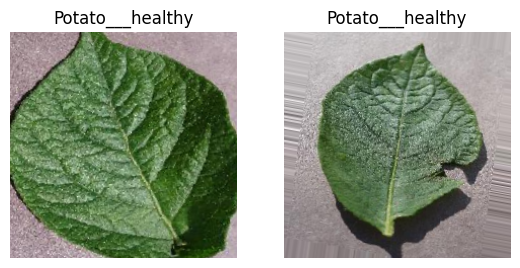

In [15]:
# Vizualize  healthy potato in the batch 

# Extract only healthy images of potato in the batch
images_batch, labels_batch = next(potato_train_generator)
healthy_class = potato_train_generator.class_indices['Potato___healthy']  
mask = np.argmax(labels_batch, axis =1) == healthy_class
healthy_images = images_batch[mask]
print("Number of healthy images in batch:", len(healthy_images))

# Display a batch of healthy potato images,,,, will only display available number of healthy potato from the batch because of shuffling
plt.figure(figsize=(10,10))
for i in range(min(9, len(healthy_images))):
    plt.subplot(3,3, i + 1)
    plt.imshow(healthy_images[i])
    plt.title(potato_class_names[2])
    plt.axis("off")
plt.show()
plt.close()

# 🌾 MODEL SELECTION AND CREATION

## 🚀 Transfer Learning Approach

In this section, we will **build and train our deep learning model for potato disease detection using transfer learning**.

Transfer learning leverages **pre-trained models (e.g., MobileNetV2)**, allowing us to:
✅ Save training time  
✅ Improve accuracy on limited datasets  
✅ Focus on domain-specific fine-tuning for crop disease classification

---

> After completing model training and evaluation for **potato**, we will begin a **new project for tomato disease detection** using the same workflow for modular, organized hackathon experimentation


In [16]:
from tensorflow.keras import layers, models

# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [18]:
# classification model for potato and pepper
base_model = tf.keras.applications.MobileNetV2(
    input_shape = (224, 224, 3),
    include_top = False,  # Exclude its original classification layer
    weights = 'imagenet'  # MobileNet pre trained on imagenet
)
base_model.trainable = False # Freeze the model to use its learned features 

In [20]:
# Adding custom classification layers on Top for two different models
potato_model = models.Sequential(
    [
        base_model, # frozen feature extractor
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(3, activation= 'softmax') # 3 for number of potato classes
    ]
)

# Adding custom classification layers on Top
pepper_model = models.Sequential(
    [
        base_model, # frozen feature extractor
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(2, activation= 'softmax') # 2 for number of pepper classes
    ]
)


In [22]:
# Model Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.CategoricalCrossentropy()

potato_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
pepper_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [23]:
# Model Training for potato
history = potato_model.fit(
    potato_train_generator,
    validation_data=potato_val_generator,
    epochs=10,
    steps_per_epoch = potato_train_generator.samples // potato_train_generator.batch_size,
    validation_steps = potato_val_generator.samples // potato_val_generator.batch_size,    
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6941 - loss: 0.7508 - val_accuracy: 0.9423 - val_loss: 0.1488
Epoch 2/10
 1/47 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9062 - loss: 0.1634

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 355ms/step - accuracy: 0.9062 - loss: 0.1634 - val_accuracy: 0.9471 - val_loss: 0.1409
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9416 - loss: 0.1631 - val_accuracy: 0.9688 - val_loss: 0.1077
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 28s 586ms/step - accuracy: 0.9688 - loss: 0.1566 - val_accuracy: 0.9688 - val_loss: 0.1053
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.9572 - loss: 0.1124 - val_accuracy: 0.9688 - val_loss: 0.1075
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 772ms/step - accuracy: 1.0000 - loss: 0.0890 - val_accuracy: 0.9688 - val_loss: 0.0971
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9813 - loss: 0.0654 - val_accuracy: 0.9688 - val_loss: 0.0938
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 377ms/step - accuracy: 1.0000 - loss: 0.0450 - val_accuracy: 0.9712 - val_loss: 0.0861
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.9826 - loss: 0.0596 - val_accuracy: 0.9760 - val_los

In [24]:
# Model Evaluation for potato on test data
potato_test_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/potato_split/test" 
potato_test_datagen = ImageDataGenerator(rescale=1./255)
potato_test_generator = potato_test_datagen.flow_from_directory(
    potato_test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

results = potato_model.evaluate(potato_test_generator)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


Found 216 images belonging to 3 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9676 - loss: 0.0662
Test Loss: 0.09022556990385056
Test Accuracy: 0.9583333134651184


In [25]:
# Model Training for pepper
history = pepper_model.fit(
    pepper_train_generator,
    validation_data= pepper_val_generator,
    epochs=10,
    steps_per_epoch = pepper_train_generator.samples // pepper_train_generator.batch_size,
    validation_steps = pepper_val_generator.samples // pepper_val_generator.batch_size,    
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.8188 - loss: 0.3840 - val_accuracy: 0.9604 - val_loss: 0.1195
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 589ms/step - accuracy: 1.0000 - loss: 0.0312 - val_accuracy: 0.9604 - val_loss: 0.1078
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.9437 - loss: 0.1284 - val_accuracy: 0.9688 - val_loss: 0.0839
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.9062 - loss: 0.1965 - val_accuracy: 0.9750 - val_loss: 0.0790
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.9761 - loss: 0.0652 - val_accuracy: 0.9729 - val_loss: 0.0737
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 573ms/step - accuracy: 0.9688 - loss: 0.0526 - val_accuracy: 0.9792 - val_loss: 0.0698
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.9679 - loss: 0.0759 - val_accuracy: 0.9833 - val_loss: 0.0569
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 46s 842ms/step - accuracy: 0.9688 - loss: 0.0832 - val_accuracy: 0.

In [26]:
# Model Evaluation for pepper on test data
pepper_test_dir = "/Users/sarfowonder/Desktop/plantVillage_testData/pepper_split/test" 
pepper_test_datagen = ImageDataGenerator(rescale=1./255)
pepper_test_generator = pepper_test_datagen.flow_from_directory(
    pepper_test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
)

results = pepper_model.evaluate(pepper_test_generator)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


Found 250 images belonging to 2 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9817 - loss: 0.0528
Test Loss: 0.03954220190644264
Test Accuracy: 0.9879999756813049


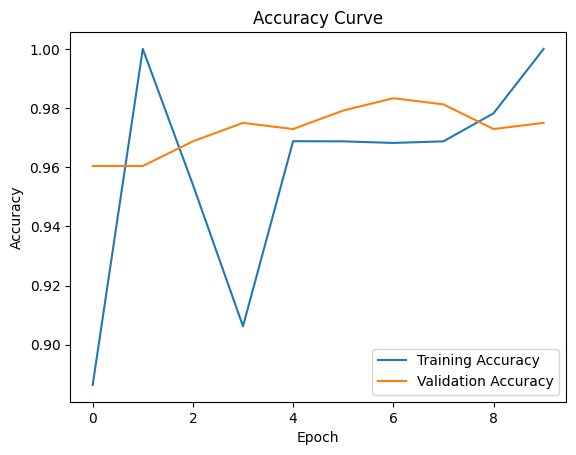

In [28]:
# Plotting training and validation curves to test overfitting
# Plot Accuracy
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

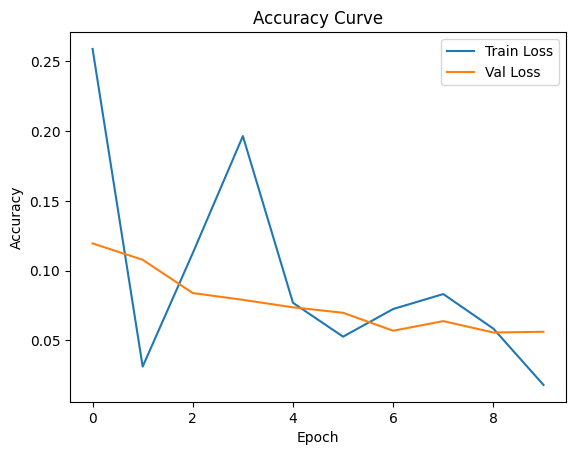

In [29]:
# Plot Loss
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()



In [34]:
# Saving model
potato_model.save("potato_disease_model.keras")
pepper_model.save("pepper_disease_model.keras")
print("Model Saved Sucessfully...")

    




Model Saved Sucessfully...
